# Data Analysis & Preprocessing

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Dataset
df = pd.read_csv('data/Foreign_Exchange_Rates.xls')
df.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,Unnamed: 24
0,0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97,NaN
1,1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13,NaN
2,2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1,NaN
3,3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62,NaN
4,4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3,NaN


In [ ]:
print("Dataset Shape:", df.shape)
print(df.info())

Dataset Shape: (5217, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 5217 non-null   int64  
 1   Time Serie                                 5217 non-null   object 
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object 
 3   EURO AREA - EURO/US$                       5217 non-null   object 
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object 
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object 
 6   BRAZIL - REAL/US$                          5217 non-null   object 
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object 
 8   CHINA - YUAN/US$                           5217 non-null   object 
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object 
 10

## Cleaning data

In [ ]:
df.drop(['Unnamed: 0', 'Unnamed: 24'], axis=1, inplace=True)  # Dropping Unnamed:0 and Unnamed:24 Columns

# Convert timeseeries to datetime
df['Time Serie'] = pd.to_datetime(df['Time Serie'], format='%d-%m-%Y')

# Convert columns to numeric data
obj_cols = df.columns.to_list()
obj_cols.remove('Time Serie')

for col in obj_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')   # If a value is not a number NaN will be returned

df.dropna()   # Drop any rows with null values

# Removing any duplicates
df.drop_duplicates()

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 5217 non-null   datetime64[ns]
 1   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   float64       
 2   EURO AREA - EURO/US$                       5019 non-null   float64       
 3   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5019 non-null   float64       
 4   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   float64       
 5   BRAZIL - REAL/US$                          5019 non-null   float64       
 6   CANADA - CANADIAN DOLLAR/US$               5019 non-null   float64       
 7   CHINA - YUAN/US$                           5020 non-null   float64       
 8   HONG KONG - HONG KONG DOLLAR/US$           5019 non-null   float64       
 9   INDIA - INDIAN RUPE

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [ ]:
df.describe()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5217,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5020.000000,5019.000000,5018.000000,...,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5016.000000,5019.000000
mean,2009-12-31 09:36:19.873490688,1.332015,0.843904,1.543683,0.640372,2.547928,1.230338,7.200820,7.782638,52.718519,...,1.480398,6.285997,106.590122,3.650950,7.074850,7.898923,119.111287,1.150461,31.764884,35.519862
min,2000-01-03 00:00:00,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,...,1.200700,4.660500,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000
25%,2004-12-31 00:00:00,1.115200,0.750800,1.323800,0.587400,1.945100,1.055700,6.475775,7.756400,45.250000,...,1.342950,5.592750,100.080000,3.291500,5.996350,6.852350,100.400000,0.966800,30.350000,31.780000
50%,2009-12-31 00:00:00,1.311000,0.815600,1.442400,0.636400,2.328800,1.237000,6.860050,7.780600,48.090000,...,1.408500,6.071700,109.020000,3.800000,6.784000,7.747800,112.300000,1.040400,31.730000,34.000000
75%,2014-12-31 00:00:00,1.430200,0.900100,1.591100,0.692350,3.129900,1.335700,8.276500,7.799800,62.432500,...,1.679150,6.714500,116.815000,3.800000,8.278200,8.743600,132.600000,1.269050,32.980000,39.405000
max,2019-12-31 00:00:00,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,...,1.854000,9.005000,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000
std,NaN,0.269918,0.126836,0.337318,0.082611,0.724216,0.182160,0.820150,0.027544,9.680986,...,0.188932,0.943508,13.210090,0.378539,1.226937,1.201860,25.342679,0.249052,1.671010,4.563073


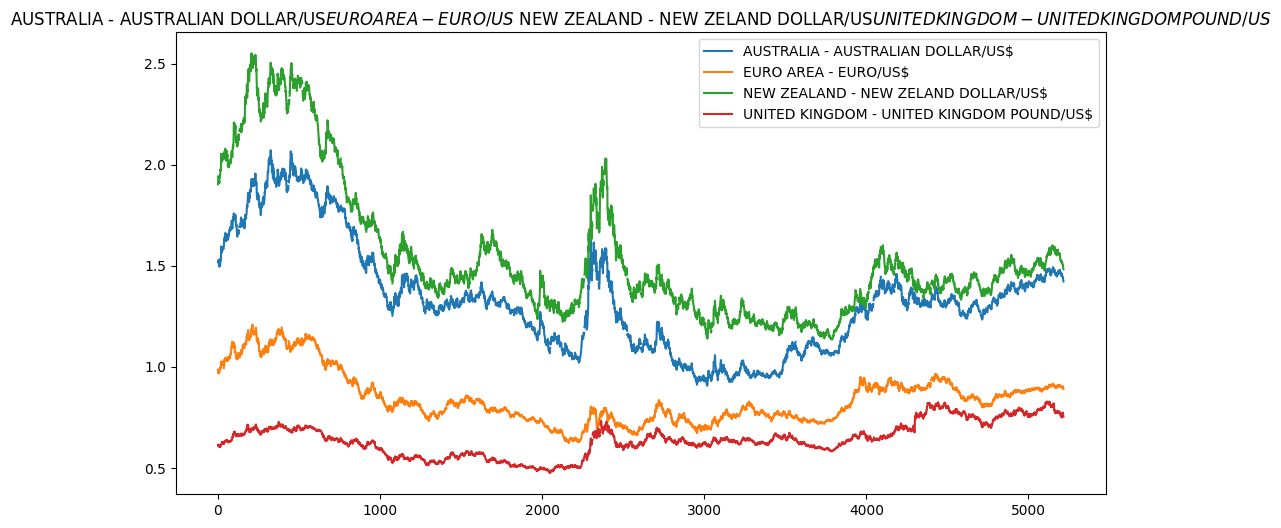

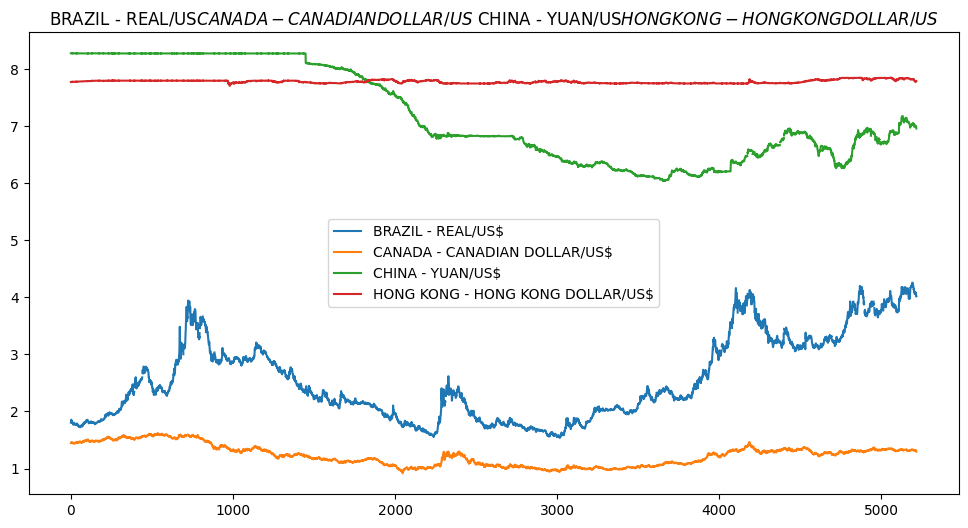

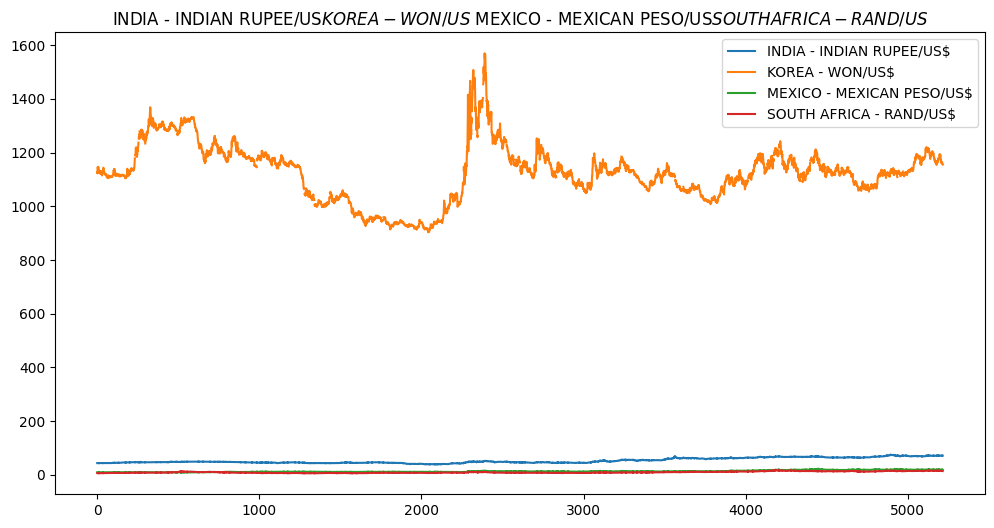

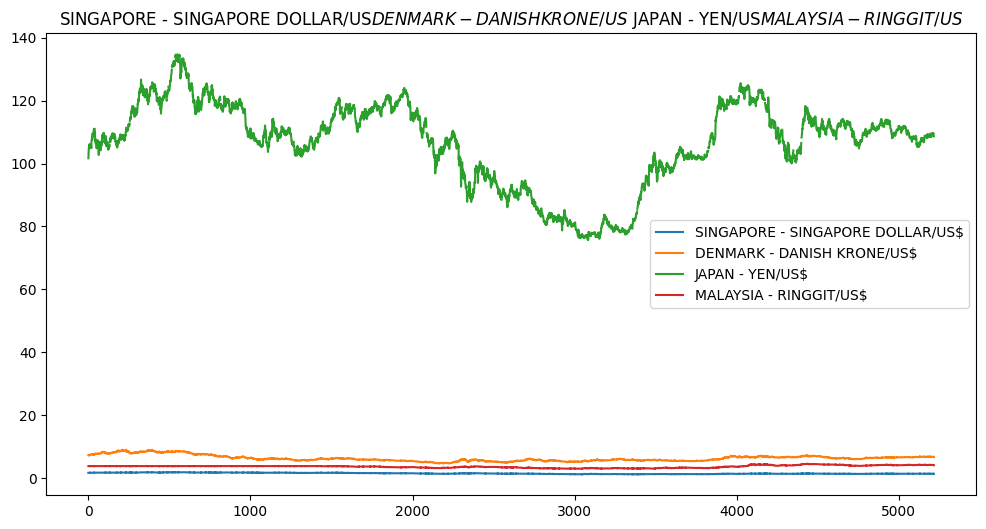

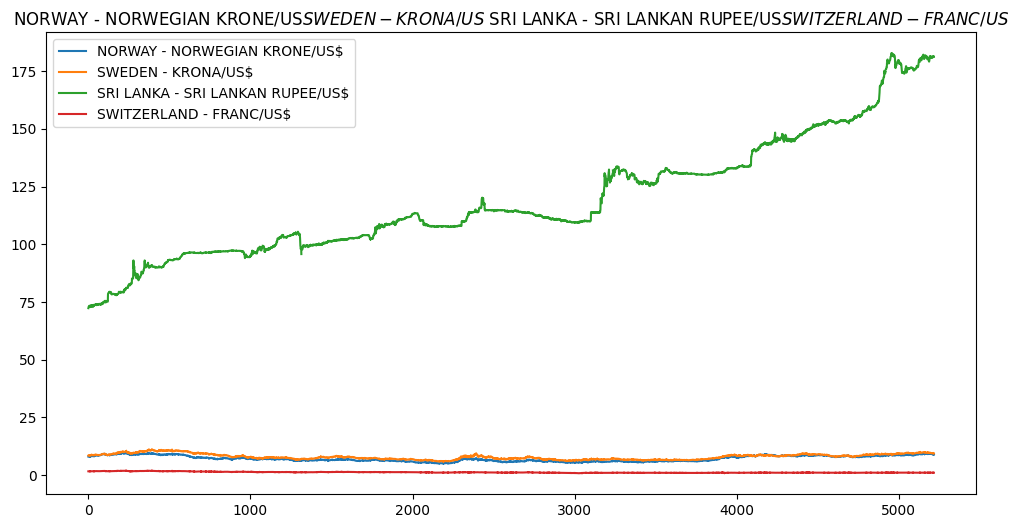

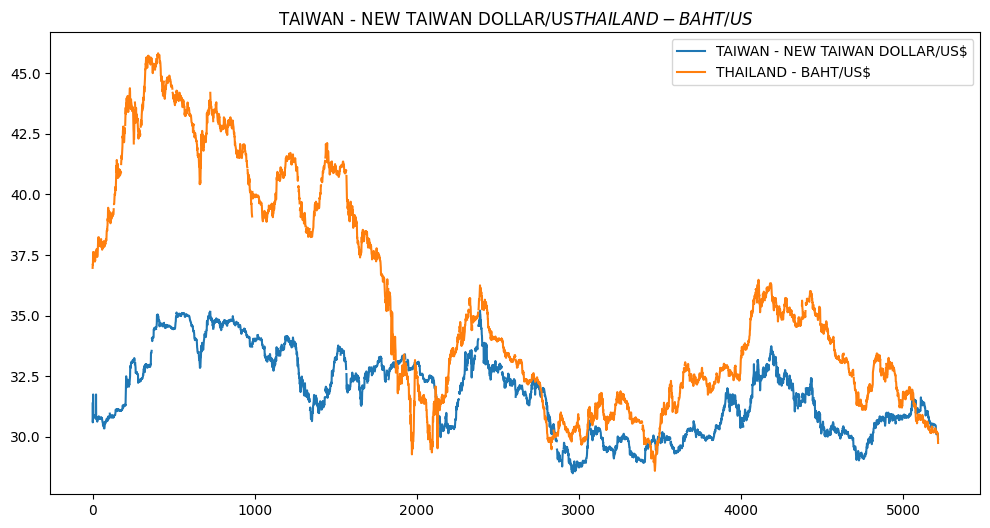

In [ ]:
# Plotting Time-series
# Spliting currencies into groups of 4
col_grps = [df.columns[i:i+4] for i in range(1, len(df.columns), 4)]

for grp in col_grps:
  df[grp].plot(figsize=(12,6), title=" ".join(grp))
  plt.show()

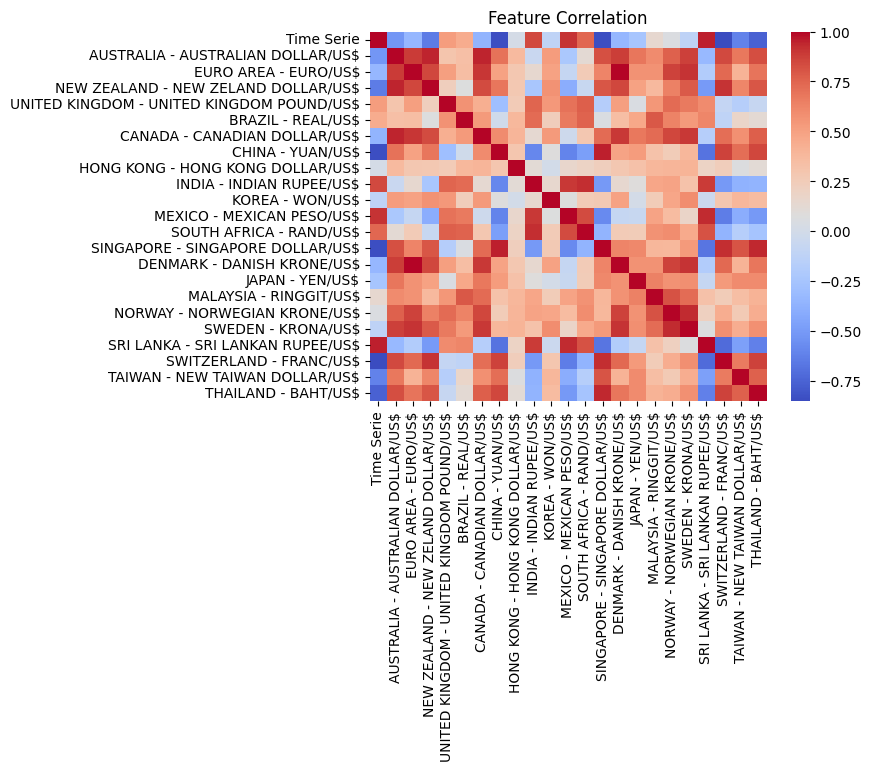

In [ ]:
# Plotting the correlation of the variables
# Correlation heatmap
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

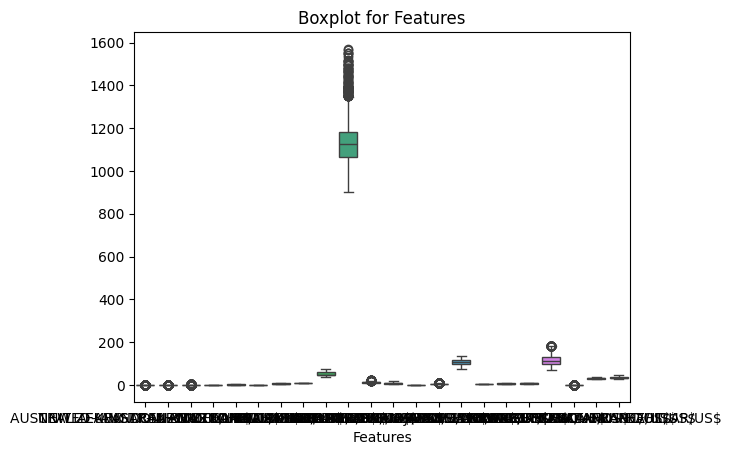

In [ ]:
# Boxplot of features
sns.boxplot(data=df)
plt.title('Boxplot for Features')
plt.xlabel('Features')
plt.show()

In [ ]:
# Plotting Data distribution


In [ ]:
#selecting currency

options = {
    'AUSTRALIAN DOLLAR': 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
    'EURO': 'EURO AREA - EURO/US$',
    'NEW ZEALAND DOLLAR': 'NEW ZEALAND - NEW ZEALAND DOLLAR/US$',
    'GREAT BRITAIN POUNDS': 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
    'BRAZILIAN REAL': 'BRAZIL - REAL/US$',
    'CANADIAN DOLLAR': 'CANADA - CANADIAN DOLLAR/US$',
    'CHINESE YUAN$': 'CHINA - YUAN/US$',
    'HONG KONG DOLLAR': 'HONG KONG - HONG KONG DOLLAR/US$',
    'INDIAN RUPEE': 'INDIA - INDIAN RUPEE/US$',
    'KOREAN WON$': 'KOREA - WON/US$',
    'MEXICAN PESO': 'MEXICO - MEXICAN PESO/US$',
    'SOUTH AFRICAN RAND$': 'SOUTH AFRICA - RAND/US$',
    'SINGAPORE DOLLAR': 'SINGAPORE - SINGAPORE DOLLAR/US$',
    'DANISH KRONE': 'DENMARK - DANISH KRONE/US$',
    'JAPANESE YEN$': 'JAPAN - YEN/US$',
    'MALAYSIAN RINGGIT': 'MALAYSIA - RINGGIT/US$',
    'NORWEGIAN KRONE': 'NORWAY - NORWEGIAN KRONE/US$',
    'SWEDEN KRONA': 'SWEDEN - KRONA/US$',
    'SRILANKAN RUPEE': 'SRI LANKA - SRI LANKAN RUPEE/US$',
    'SWISS FRANC': 'SWITZERLAND - FRANC/US$',
    'NEW TAIWAN DOLLAR': 'TAIWAN - NEW TAIWAN DOLLAR/US$',
    'THAI BAHT': 'THAILAND - BAHT/US$'
}

selected_option = 'SRILANKAN RUPEE' #select currency here to train model

In [ ]:
# Finding the best model for each currency
